In [1]:
%matplotlib inline

In [2]:
from __future__ import division

In [3]:
import numpy as np
import nibabel as nb
from vtk_rw import read_vtk, write_vtk
import matplotlib.pyplot as plt
import seaborn as sns

### load func nifti, highres in sub space, labelling

In [4]:
labels_file= '/scr/ilz3/myelinconnect/all_data_on_simple_surf/labels/BP4T_rh_highres2lowres_labels.npy'
rest_file = '/scr/ilz3/myelinconnect/resting/final/BP4T_rest1_1_denoised.nii.gz'
#rest_file = '/scr/ilz3/myelinconnect/resting/preprocessed/BP4T/rest1_1/realignment/corr_BP4T_rest1_1_roi_tsnr.nii.gz'
highres_file = '/scr/ilz3/myelinconnect/struct/surf_rh/orig2func/BP4T_rh_mid_groupavgsurf.vtk'

In [5]:
labels =np.load(labels_file)[:,1]

In [7]:
img = nb.load(rest_file)
rest = img.get_data()
affine = img.get_affine()

In [8]:
highres_v, highres_f, highres_d = read_vtk(highres_file)

In [9]:
print rest.shape
print highres_v.shape

(128, 128, 70, 295)
(738954, 3)


### for each vertex find the corresponding voxel

In [10]:
# test by creating mask with indexed voxels

In [11]:
dim = [affine[0,0], affine[1,1], affine[2,2]]
dim = -(np.round(dim, 1))

In [12]:
fake = np.zeros((rest.shape[0], rest.shape[1], rest.shape[2]))
idx = np.asarray(np.round(highres_v/dim), dtype='int64')
fake[idx[:,0],idx[:,1],idx[:,2]] += 1

In [13]:
check = nb.load('/scr/ilz3/myelinconnect/struct/surf_rh/orig2func/BP4T_rh_mid_groupavgsurf_data.nii.gz').get_data()

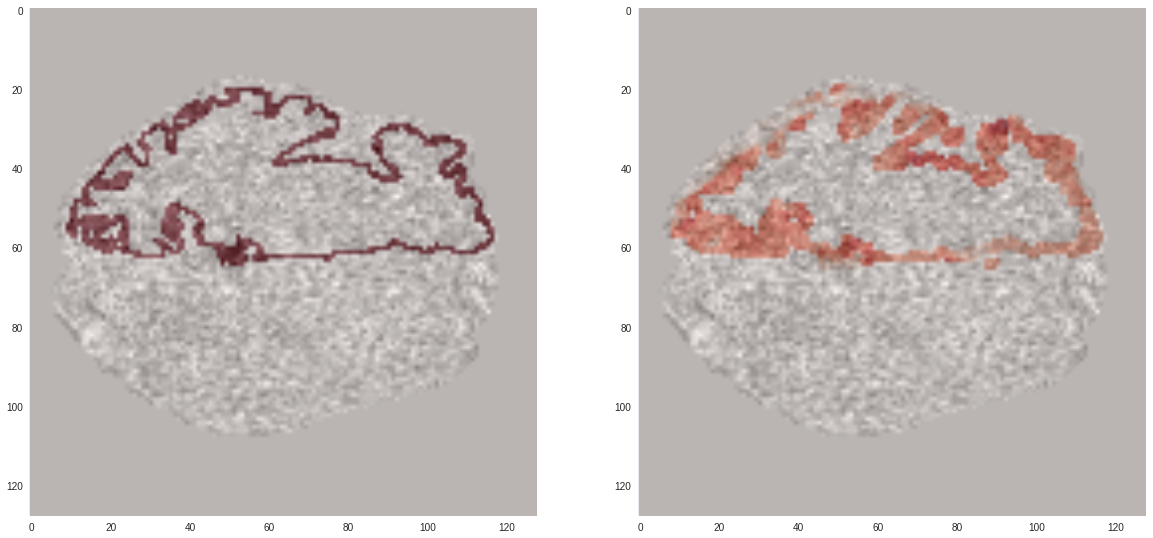

In [15]:
s=20
sns.set_style('dark')
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
plt.imshow(rest[:,:,s, 100], cmap='gray')
plt.imshow(fake[:,:,s], cmap='Reds', alpha=0.5)
fig.add_subplot(1,2,2)
plt.imshow(rest[:,:,s, 100], cmap='gray')
plt.imshow(check[:,:,s], cmap='Reds', alpha=0.5)

In [16]:
# actually finding the data
idx = np.asarray(np.round(highres_v/dim), dtype='int64')
rest_highres = rest[idx[:,0],idx[:,1],idx[:,2]]

### mean across lables

In [20]:
def sample_simple(highres_data, labels):
    # create new empty lowres data array
    lowres_data = np.empty((int(labels.max()+1), highres_data.shape[1]))
    # find all vertices on highres and mean
    for l in range(int(labels.max()+1)):
        patch = np.where(labels==l)[0]
        patch_data = highres_data[patch]
        patch_mean = np.mean(patch_data, axis=0)
        lowres_data[l] = patch_mean
    
    return lowres_data

In [21]:
rest_lowres = sample_simple(rest_highres, labels)

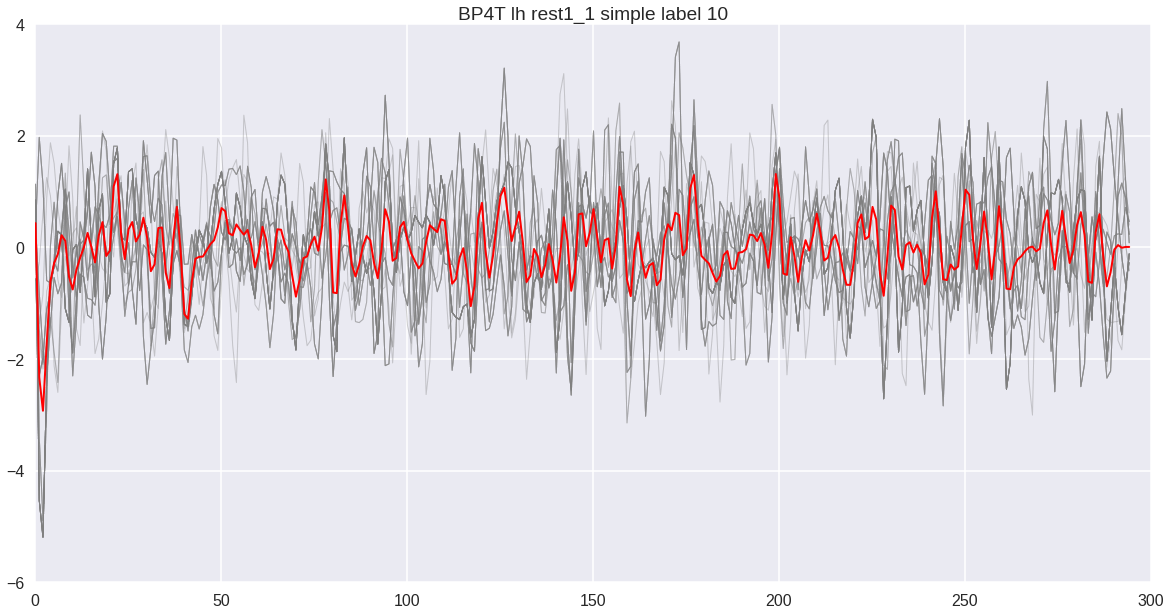

In [24]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('darkgrid')
fig =plt.figure(figsize=(20,10))
v = 10
for i in range(np.where(labels==v)[0].shape[0]):
    plt.plot(rest_highres[np.where(labels==v)[0][i]], color='gray', alpha=0.2, lw=1)
plt.plot(rest_lowres[v], label='mean', color='r', lw=2)
#plt.legend()
plt.title('BP4T lh rest1_1 simple label %s'%(v))


In [ ]:
fig.savefig('/scr/ilz3/myelinconnect/func_sampling_example_10.png')